# Pre-processing nextnano3D data and loading potentials tutorial

This tutorial will show you how to use the potential module to pre-process <br />
simulation data from nextnano3D. Specifically, take a 3D potnetial lanscape  <br />
and process the data format to produce 2D slices at a user-specified  <br />
z-coordinate for various control voltages used during the simulation runs. Next <br />
the tutorial will show how to the load pre-processed 2D potential files.

## 1. Load the relevant modules and process the NextNano 3D data

First the relavent modules are loaded.

In [7]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))

import qudipy as qd
import qudipy.potential as pot
import qudipy.utils.helpers as hp

import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Define the source directory for the nextnano3D simulation data.
input_nextnano =    os.path.join(sys.path[0], 'QuDiPy tutorial data','Nextnano simulations','TMPLATE_5Gate_1.358E15_noRGrind')
# Define a directory location which will contain the pre-processed potential data for a given 2D slice. If this directory doesn't exist currently then it will be created.
output_preprocessed = os.path.join(sys.path[0], 'QuDiPy tutorial data','Pre-processed potentials','Pre-processed_data')

print(input_nextnano)
print(output_preprocessed)

/home/zach/Documents/github/qudip_project/control_pulses/tutorials/QuDiPy tutorial data/Nextnano simulations/TMPLATE_5Gate_1.358E15_noRGrind
/home/zach/Documents/github/qudip_project/control_pulses/tutorials/QuDiPy tutorial data/Pre-processed potentials/Pre-processed_data



Note the nextnano file structure:

    /simulation_runs
        /simulation_run_#_with_ctrl_names/values
            /output directory
                /bias_000_000_000
                    data files
                /Structure
                    data files
                data files
            data files
            simulation run meta data file

Data file types to be referenced/imported: .coord, .dat, .fld

Index the potential dictionary as follows:

1. `potential[#]`: Returns a dictionary containing [control values, potential data, coordinate data] for the simulation run #.
2. `potential[#]['ctrl_names']`: Returns the control values
3. `potential[#]['ctrl_values']`: Returns the potential data
4. `potential[#]['coord']`: Returns the coordinate data which is a dictionary with keys 'x','y', and 'z'.


In [9]:
# Import all of the neccessary potential data and meta data for the simulation runs.
# Potential is a dictionary data type containing nested list.
# Each element of the dictionary contains [list of control valuess, list of potential data, dictionary for x,y, and z cordinate data].
potential = pot.process_nextnano.import_dir(input_nextnano, show_files=True)

# Note the nested dictionary key structure
print(potential.keys())
print(potential[0]['ctrl_names'])
print(potential[0]['ctrl_values'])
print(potential[0]['coord'].keys())

Importing .coord data files from /TEMPLATE_5Gate_Dop_1.358E15_noRGrid_V1_0.100_V2_0.200_V3_0.200_V4_0.200_V5_0.100:
Importing .dat data files from /TEMPLATE_5Gate_Dop_1.358E15_noRGrid_V1_0.100_V2_0.200_V3_0.200_V4_0.200_V5_0.100:
Importing .coord data files from /TEMPLATE_5Gate_Dop_1.358E15_noRGrid_V1_0.100_V2_0.200_V3_0.200_V4_0.220_V5_0.100:
Importing .dat data files from /TEMPLATE_5Gate_Dop_1.358E15_noRGrid_V1_0.100_V2_0.200_V3_0.200_V4_0.220_V5_0.100:
Importing .coord data files from /TEMPLATE_5Gate_Dop_1.358E15_noRGrid_V1_0.100_V2_0.200_V3_0.200_V4_0.260_V5_0.100:
Importing .dat data files from /TEMPLATE_5Gate_Dop_1.358E15_noRGrid_V1_0.100_V2_0.200_V3_0.200_V4_0.260_V5_0.100:
Importing .coord data files from /TEMPLATE_5Gate_Dop_1.358E15_noRGrid_V1_0.100_V2_0.200_V3_0.200_V4_0.240_V5_0.100:
Importing .dat data files from /TEMPLATE_5Gate_Dop_1.358E15_noRGrid_V1_0.100_V2_0.200_V3_0.200_V4_0.240_V5_0.100:
dict_keys([0, 1, 2, 3])
[0.1, 0.2, 0.2, 0.2, 0.1]
[[1.14959607]
 [1.14959607]
 [

In [10]:
# Enter the desired z coordinate to take a cross-section of the x-y plane. 
# The  slice along the z axis will be preformed for the nearest simulated z-coordinate to the user defined coordinate.
z = 0.45

# Now we define the field types we wish to write 2D slices for, either, potential or the electric field.
save_flag = pot.process_nextnano.write_data(input_nextnano,output_preprocessed, slice=z, f_type=['potential','field'])

SAVE SUCCESS: Converting 3D nextnano simulation data to 2D XY-plane potential along slice for z = 0.4.
SAVE SUCCESS: Converting 3D nextnano simulation data to 2D XY-plane field along slice for z = 0.4.


## 2. Ensure the NextNano potential files were converted as desired

We need to specify the name of the folder that contains the potential files as well as the names for each potential file.

The modules for process_nextnano take a user specified z-coordinate and finds the nearest slice which correspondes to a a simulated z-cooredinate.

In [11]:
_, nearest_slice = hp.find_nearest(potential[0]['coord']['z'], z)

Now we enter the name of the folder where the potential files are located and specify the control values. If the directory to the potential data is not specified as an argument the code defaults to the current working directory.

In [12]:
pot_dir = output_preprocessed + '_for_nearest_slice{:.3e}'.format(nearest_slice)

# Specify the control voltage names (C#NAME as mentioned above)
ctrl_names = ['V1','V2','V3','V4','V5']

# Specify the control voltage values you wish to load.
# The cartesian product of all these supplied voltages will be loaded and MUST exist in the directory.
V1 = [0.1]
V2 = [0.2]
V3 = [0.2]
V4 = [0.2, 0.22, 0.24, 0.26]
V5 = [0.1]

ctrl_vals = [V1, V2, V3, V4, V5] 

# Or extract voltage values from the the imported nextnano data  
ctrl_vals = pot.process_nextnano.get_ctrl_vals(potential)



 Now load the potentials for the newly created potential files. Load_files <br />
 returns a dictionary of all the information loaded:
 - **f_type:** says we are loading potential files <br />
    (other option is to load electric field files)
 - **f_dir:** specifies where the files are located
 - **f_dis_units:** specifies the distance units the files are in. The function <br />
 will convert the units to [m].
 - **f_pot_units:** specifies the potential units the files are in. The function <br />
 will convert the units to [J].

In [13]:

loaded_data = pot.load_potentials(ctrl_vals, ctrl_names,
                                  f_type='pot', f_dir=pot_dir,
                                  f_dis_units='nm', f_pot_units='eV')
# Additional keyword arguments are trim_x and trim_y which will trim the loaded potentials 
# to be only within the bounds specified by trim_x and trim_y

# We can check the fields of the dictionary returned to see what is stored.
loaded_data.keys()

dict_keys(['coords', 'ctrl_vals', 'ctrl_names', 'potentials'])

We can also go on to plot all of potential crossections along the x/y-planes for the choosen slice.

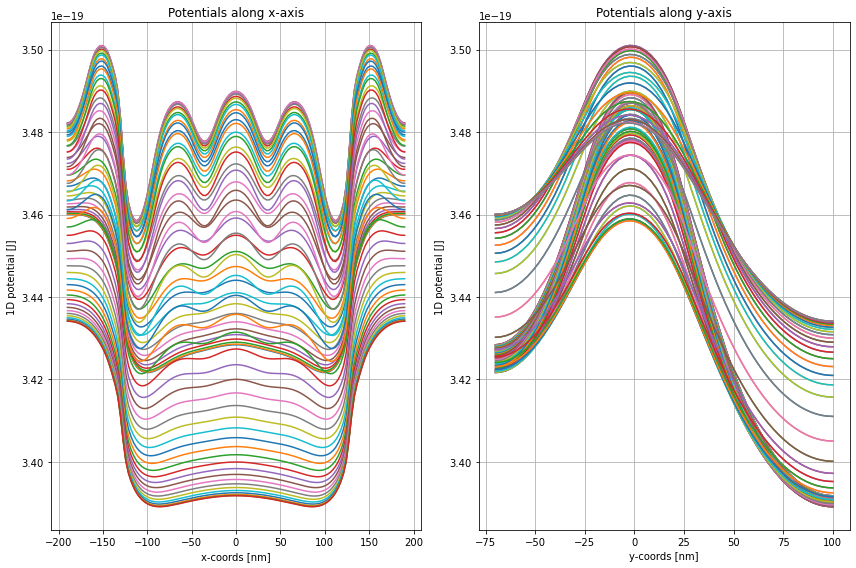

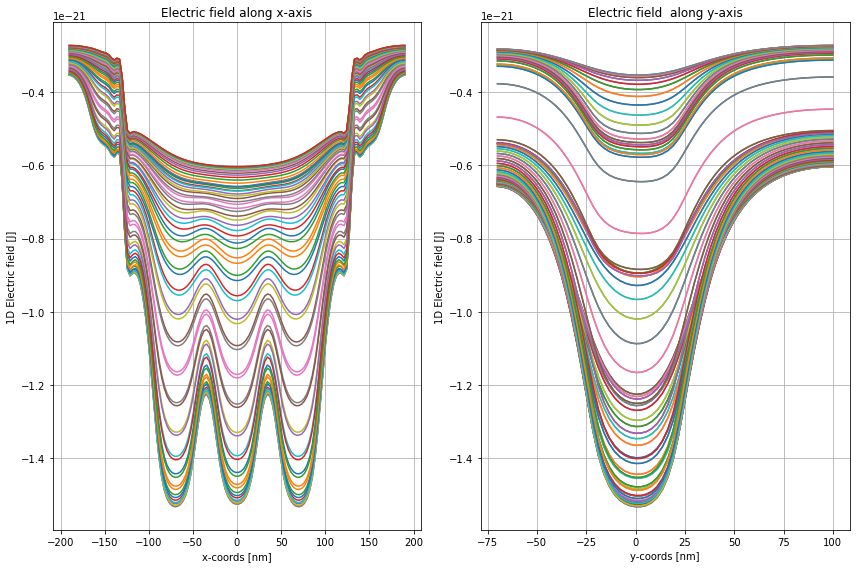

In [14]:

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# potential along x-axis at y-axis slice
for i in range(np.shape(loaded_data['coords'][1])[0]):
    ax1.plot(loaded_data['coords'][0].T/1E-9,loaded_data['potentials'][0][i,:].T)
ax1.set(xlabel='x-coords [nm]', ylabel='1D potential [J]',
title=f'Potentials along x-axis')  
ax1.grid()  

# potential along y-axis at x-axis slice
for i in range(np.shape(loaded_data['coords'][0])[0]):
    ax2.plot(loaded_data['coords'][1]/1E-9,loaded_data['potentials'][0][:,i])
ax2.set(xlabel='y-coords [nm]', ylabel='1D potential [J]',
title=f'Potentials along y-axis')
ax2.grid()

fig.tight_layout()       
plt.show()

# Now load the Electric field for the newly created potential files  
loaded_data_field = pot.load_potentials(ctrl_vals, ctrl_names,
                                  f_type='electric', f_dir=pot_dir,
                                  f_dis_units='nm', f_pot_units='eV')

# We can check the fields of the dictionary returned to see what is stored.
loaded_data_field.keys()

# We can also go on to plot all of potential crossections along the x/y-planes for the choosen slice.
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# potential along x-axis at y-axis slice
for i in range(np.shape(loaded_data_field['coords'][1])[0]):
    ax1.plot(loaded_data_field['coords'][0].T/1E-9,loaded_data_field['electric'][0][i,:].T)
ax1.set(xlabel='x-coords [nm]', ylabel='1D Electric field [J]',
title=f'Electric field along x-axis')  
ax1.grid()  

# potential along y-axis at x-axis slice
for i in range(np.shape(loaded_data_field['coords'][0])[0]):
    ax2.plot(loaded_data_field['coords'][1]/1E-9,loaded_data_field['electric'][0][:,i])
ax2.set(xlabel='y-coords [nm]', ylabel='1D Electric field [J]',
title=f'Electric field  along y-axis')
ax2.grid()

fig.tight_layout()       
plt.show()